<a href="https://colab.research.google.com/github/RakshithDB1/Predication-of-liver-disease-using-machine-learning-techniques/blob/master/svm_modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
liverdata = pd.read_csv('/content/Indian Liver Patient Dataset (ILPD).csv')

In [4]:
liverdata.columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset']

In [5]:
liverdata["Albumin_and_Globulin_Ratio"].fillna("0.6", inplace = True)
liverdata['Gender']=liverdata.Gender.map(dict(Female=0,Male=1))
liverdata

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,1,1.0,0.4,182,14,20,6.8,3.4,1,1
3,72,1,3.9,2.0,195,27,59,7.3,2.4,0.4,1
4,46,1,1.8,0.7,208,19,14,7.6,4.4,1.3,1
...,...,...,...,...,...,...,...,...,...,...,...
577,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
578,40,1,0.6,0.1,98,35,31,6.0,3.2,1.1,1
579,52,1,0.8,0.2,245,48,49,6.4,3.2,1,1
580,31,1,1.3,0.5,184,29,32,6.8,3.4,1,1


Number of patients diagnosed with liver disease:  415
Number of patients not diagnosed with liver disease:  167


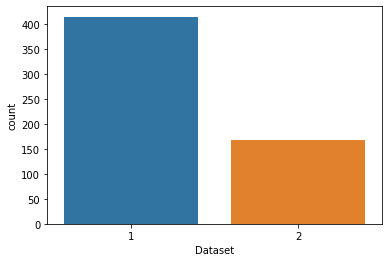

In [6]:
sns.countplot(data=liverdata, x = 'Dataset', label='Count')

LD,NLD = liverdata['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

In [7]:
liverdata_sex = pd.get_dummies(liverdata['Gender'])
liverdata_new = pd.concat([liverdata, liverdata_sex], axis=1)
liverdata_gender = liverdata_new.drop(labels=['Gender' ],axis=1 )
liverdata_gender.columns = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','1','0','Dataset']

X = liverdata_gender.drop('Dataset',axis=1)
Y = liverdata_gender['Dataset']


# split data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 99)


#scaling of the data using min-max scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [8]:
params_grid = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
               {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(kernel="rbf", probability=True, C=0.1, gamma=0.001), params_grid, cv=5)
svm_model.fit(X_train, Y_train)


#model = SVC(kernel="rbf", probability=True, C=0.1, gamma=0.001, max_iter=10000)
#svm_model = GridSearchCV(model, parameters, n_jobs=-1, cv=3)

svm_model.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=0.1, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=0.001,
                           kernel='rbf', max_iter=-1, probability=True,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [10]:
Y_predict = svm_model.predict(X_test)
cm = confusion_matrix(Y_test,Y_predict)

In [11]:
cm = np.array(confusion_matrix(Y_test,Y_predict,labels=[1,0]))

confusion=pd.DataFrame(cm, index=['is_Liver_Disease', 'No_Liver_Disease'], columns=['Prediction_of_Disease', 'Prediction_of_Healthy']) 
confusion

,Prediction_of_Disease,Prediction_of_Healthy
is_Liver_Disease,141,0
No_Liver_Disease,0,34


In [12]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00       141

    accuracy                           1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00       175



In [13]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
accuracy = accuracy_score(Y_test,Y_predict)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [14]:
import joblib

# Save the model as a pickle in a file
joblib.dump(svm_model, 'svm.pkl')

['svm.pkl']